### Python Reddit API Wrapper 설치

In [1]:
pip install praw

   ---------------------------------------- 0.0/191.0 kB ? eta -:--:--
   ------ -------------------------------- 30.7/191.0 kB 660.6 kB/s eta 0:00:01
   ------------------------------ --------- 143.4/191.0 kB 1.7 MB/s eta 0:00:01
   ---------------------------------------- 191.0/191.0 kB 1.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


### PRW 임포팅
- PRW 관련 document : https://praw.readthedocs.io/en/latest/

In [1]:
import praw
import pandas as pd
from tqdm import tqdm
import datetime

### PRAW API를 통해 Reddit에 접근하는 사용자 등록
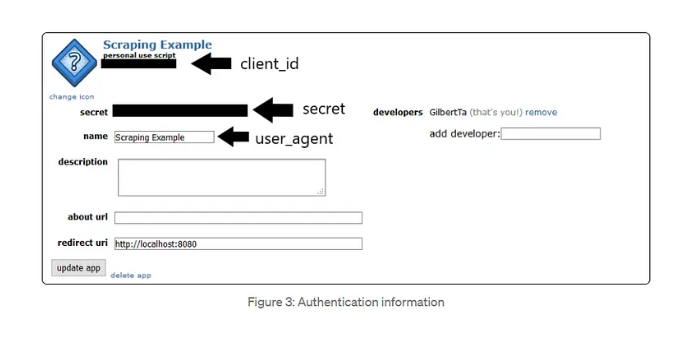

In [13]:
# Reddit API 접속 설정
reddit = praw.Reddit(client_id = 'M_roK-pfID6N2s9P1IYGQA', client_secret = '1X2YHVxGMNmaInoYuhDQ-tUhwbWEXQ', user_agent = 'WebScraping')

### subreddit 선정해서 데이터 수집

In [14]:
# 크롤링할 서브레딧과 키워드 설정
subreddit_name = "AskIndia"
keyword = "LG"
limit = 100  # 검색할 게시글 수 제한 (필요에 따라 조정 가능)

In [15]:
# 검색 기간 설정 (예: 1년 전부터 오늘까지)
start_time = int(datetime.datetime(2015, 1, 1).timestamp())
end_time = int(datetime.datetime.now().timestamp())

In [16]:
# 서브레딧에서 게시글 검색
subreddit = reddit.subreddit(subreddit_name)
posts = subreddit.search(f'title:"{keyword}" OR selftext:"{keyword}" OR comments:"{keyword}"', sort='new', time_filter='all', limit=limit)

In [17]:
# 데이터 저장을 위한 리스트
data = []

In [18]:
# tqdm을 사용하여 크롤링 진행 상황 모니터링
for post in tqdm(posts, total=limit):
    # 게시글의 작성 시기가 설정된 기간 내에 있는지 확인
    if start_time <= int(post.created_utc) <= end_time:
        post_data = {
            "post_id": post.id,
            "title": post.title,
            "selftext": post.selftext,
            "created_utc": datetime.datetime.utcfromtimestamp(post.created_utc),
            "comments": []
        }
        
        # 댓글 크롤링
        post.comments.replace_more(limit=None)  # '더 보기'를 모두 확장
        for comment in post.comments.list():
            post_data["comments"].append(comment.body)
        
        data.append(post_data)

 12%|█▏        | 12/100 [00:05<00:37,  2.37it/s]


In [19]:
# 데이터프레임으로 저장
df = pd.DataFrame(data)

In [20]:
print(df)
df.to_csv("Reddit_CS_AskIndia.csv", index=False)

    post_id                                              title  \
0   1evwqqr                               LG AC Service: Scam?   
1   1e9z788  Which Washing machine to buy from these options?    
2   1e64bok                                   Are Mi tv good?    
3   1e2ccjz                                    Feeling lonely    
4   1d4t4fz                 Is it reliable to buy ac online???   
5   1begn7c                                   Which AC to buy?   
6   1bdwpyt                                         Need help    
7   19agchr                                           DESCALER   
8   19afqc1  Dear Men, how long will it take you to underst...   
9   17fwnij  What is you opnion on TV from brands other tha...   
10   btjn3i             Does jio volte work on lg g6 t-mobile?   
11   4kcohn  Does LG LF series LED TV passthrough 5.1 dolby...   

                                             selftext         created_utc  \
0   A month before my warranty ran out, I noticed ... 2024-08-19

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   post_id      12 non-null     object        
 1   title        12 non-null     object        
 2   selftext     12 non-null     object        
 3   created_utc  12 non-null     datetime64[ns]
 4   comments     12 non-null     object        
dtypes: datetime64[ns](1), object(4)
memory usage: 612.0+ bytes


In [11]:
df

post_id                                              title  \
0   1evwqqr                               LG AC Service: Scam?   
1   1e9z788  Which Washing machine to buy from these options?    
2   1e64bok                                   Are Mi tv good?    
3   1e2ccjz                                    Feeling lonely    
4   1d4t4fz                 Is it reliable to buy ac online???   
5   1begn7c                                   Which AC to buy?   
6   1bdwpyt                                         Need help    
7   19agchr                                           DESCALER   
8   19afqc1  Dear Men, how long will it take you to underst...   
9   17fwnij  What is you opnion on TV from brands other tha...   
10   btjn3i             Does jio volte work on lg g6 t-mobile?   
11   4kcohn  Does LG LF series LED TV passthrough 5.1 dolby...   

                                             selftext         created_utc  \
0   A month before my warranty ran out, I noticed ... 2024-08-19 08:36:36   
1   Budget is under 14k-18k.\nFamily size: 3\nAvai... 2024-07-23 04:44:45   
2   I've been thinking about purchasing an android... 2024-07-18 06:07:07   
3   Bada ajib lg raha hai  and the main problem ki... 2024-07-13 14:57:23   
4   I live in a village near a tier 2 city in Guja... 2024-05-31 11:15:06   
5   I have a budget of 45k, I want to buy a new AC... 2024-03-14 08:49:44   
6   So I'm currently doing bcom hons.first year an... 2024-03-13 17:06:00   
7   Can someone recommend me the best and the chea... 2024-01-19 10:45:38   
8   Anyone told you some fetus are unlucky for bei... 2024-01-19 10:02:14   
9                                                     2023-10-25 04:28:51   
10  I ported to jio from airtel, hoping volte woul... 2019-05-27 08:43:21   
11  I am looking for this settup -  my raspberry p... 2016-05-21 08:00:53   

                                             comments  
0   [Just file a grievance with online consumer fo...  
1   [Avoid all these mate. Bosch is the second bes...  
2   [In case of TVs, panel is the most important t...  
3   [Just watch some feel good movies and try to d...  
4   [Now a days the local dealers agree on the pri...  
5   [Nothing beats bluestar in this industry, Go f...  
6                                                  []  
7   [dmart has their own DeScaler which are around...  
8   [Typical /r/antinatalism bullshit lol what a c...  
9   [Difference is the life of the product and tec...  
10  [Could be because LG G6 T-Mobile version of th...  
11  [I don't think so. Optical out will pass throu...

In [12]:
# title과 selftext를 결합하여 새로운 열을 생성
df['combined_text'] = df.apply(lambda row: row['title'] + ' ' + row['selftext'], axis=1)

# 결합된 텍스트 출력 (필요 시 전체 출력 또는 일부 출력)
print(df['combined_text'])

# 모든 결합된 텍스트를 하나의 문자열로 결합
all_combined_text = ' '.join(df['combined_text'])
print(all_combined_text)

0     LG AC Service: Scam? A month before my warrant...
1     Which Washing machine to buy from these option...
2     Are Mi tv good?  I've been thinking about purc...
3     Feeling lonely  Bada ajib lg raha hai  and the...
4     Is it reliable to buy ac online??? I live in a...
5     Which AC to buy? I have a budget of 45k, I wan...
6     Need help  So I'm currently doing bcom hons.fi...
7     DESCALER Can someone recommend me the best and...
8     Dear Men, how long will it take you to underst...
9     What is you opnion on TV from brands other tha...
10    Does jio volte work on lg g6 t-mobile? I porte...
11    Does LG LF series LED TV passthrough 5.1 dolby...
Name: combined_text, dtype: object
LG AC Service: Scam? A month before my warranty ran out, I noticed a drop in the cooling performance and called LG Service. They cleaned the air filter, claimed that the poor performance was because of that, and vanished. I was still unsatisfied, but they kept giving one excuse or the other.


In [6]:
# DataFrame 출력 형태 설정
pd.options.display.max_colwidth = 2000
pd.set_option('display.max_rows',None)

In [7]:
posts_pd = pd.DataFrame(posts_list, columns = ['title', 'created_utc', 'flair text', 'selftext'])
posts_pd
#posts_pd_align = posts_pd.style.set_properties(subset=['title','selftext'],**{'text-align':'left'})
#posts_pd_align

title  \
0                                                                                                                                                                                                                                                               What similar stories do you have  ? 🤔   
1                                                                                                                                                                                                                                                                          Meet Gus, our society cat!   
2                                                                                                                                                                                                                                             Momo got scared in his own territory due to free kisses   
3                                                                                                                                                                                                                                                              why do people leave puppies like that.   
4                                                                                                                                                                                                                                                                                  Should I keep Joy?   
5                                                                                                                                                                                                                                                                     Ello humans please stop working   
6                                                                                                                                                                                                                                                                       Laila and some photo shoot 🍁💕   
7                                                                                                                                                                                                                                         India, the land of wonders, has a special place for dogs !    
8                                                                                                                                                                                                                                                                 Caption this one, ladies and gents!   
9                                                                                                                                                                                                                                                                   What is Chiku trying to say guys?   
10                                                                                                                                                                                                                                                                Help bro learn complicated concepts   
11                                                                                                                                                                                                                                                                                                  🧿   
12                                                                                                                                                                                                                                                      This hardworking man won't sleep without AC.    
13                                                                                                                                

### 데이터 전처리

#### 1) flair 빈도수 확인

In [8]:
posts_pd['flair text'].value_counts()

flair text
Photo/Video                 494
Adoption                     25
Discussion                   18
Help                         15
dog photo/vid :doge:         13
Vent                          7
cat photo/vid :cat_blep:      4
Behaviour                     3
Health                        2
Discussion :sloth:            1
Name: count, dtype: int64

#### 2) 대문자 전환

In [9]:
def lower_capital(row):
    return row.lower()

In [10]:
posts_pd['title'] = posts_pd['title'].apply(lower_capital)
#posts_pd['flair text'] = posts_pd['flair text'].apply(lower_capital)
posts_pd['selftext'] = posts_pd['selftext'].apply(lower_capital)
posts_pd

title  \
0                                                                                                                                                                                                                                                               what similar stories do you have  ? 🤔   
1                                                                                                                                                                                                                                                                          meet gus, our society cat!   
2                                                                                                                                                                                                                                             momo got scared in his own territory due to free kisses   
3                                                                                                                                                                                                                                                              why do people leave puppies like that.   
4                                                                                                                                                                                                                                                                                  should i keep joy?   
5                                                                                                                                                                                                                                                                     ello humans please stop working   
6                                                                                                                                                                                                                                                                       laila and some photo shoot 🍁💕   
7                                                                                                                                                                                                                                         india, the land of wonders, has a special place for dogs !    
8                                                                                                                                                                                                                                                                 caption this one, ladies and gents!   
9                                                                                                                                                                                                                                                                   what is chiku trying to say guys?   
10                                                                                                                                                                                                                                                                help bro learn complicated concepts   
11                                                                                                                                                                                                                                                                                                  🧿   
12                                                                                                                                                                                                                                                      this hardworking man won't sleep without ac.    
13                                                                                                                                

#### 3) 이모지 제거


In [11]:
# 입력받은 데이터가 아스키코드에 포함되어 있지 않으면 무시 후 반환
def rmEmoji_ascii(inputString):
    return inputString.encode('ascii', 'ignore').decode('ascii')

In [12]:
posts_pd['title'] = posts_pd['title'].apply(rmEmoji_ascii)
posts_pd['selftext'] = posts_pd['selftext'].apply(rmEmoji_ascii)

#### 4) NLTK로 토크나이징

In [41]:
# nltk 설치가 안되어있다면 아래 문장 주석 해제하고 설치
# !pip install nltk

In [13]:
# nltk 임포팅
import nltk

In [14]:
# 불용어 사전 불러오기
stopwords = nltk.corpus.stopwords.words('english')
#stopwords

In [15]:
# 불용어 제외 + 명사 추출 함수 
def extract_noun(string) :
    split_text = nltk.word_tokenize(string)
    tagged_text = nltk.pos_tag(split_text)
    words = [word for word, tag in tagged_text if tag in {'NN','NNS','NNP','NNPS'} if word not in stopwords] 
    return words

In [16]:
str_title = extract_noun(str(posts_pd['title']))
str_selftext = extract_noun(str(posts_pd['selftext']))

In [17]:
# 정규식 표현 위한 re 모듈 임포
import re

In [18]:
str_title_list = []
str_selftext_list = []

for str in str_title:
    if(re.sub(r"[^\uAC00-\uD7A30-9a-zA-Z\s]", "", str)==''):
        continue
    str_title_list.append(re.sub(r"[^\uAC00-\uD7A30-9a-zA-Z\s]", "", str))

for str in str_selftext:
    if(re.sub(r"[^\uAC00-\uD7A30-9a-zA-Z\s]", "", str)==''):
        continue
    str_selftext_list.append(re.sub(r"[^\uAC00-\uD7A30-9a-zA-Z\s]", "", str))

In [50]:
#str_title_list
#str_selftext_list

In [19]:
str_info = str_title_list+str_selftext_list
#str_info

### 데이터 분석

#### 1) 워드클라우드 시각화

In [20]:
# 워드클라우드 import
from wordcloud import WordCloud
# 워드를 카운팅해주는 라이브러리
from collections import Counter
# 데이터를 시각화 해주는 라이브러리
import matplotlib.pyplot as plt

In [21]:
count = Counter(str_info)
# count

In [22]:
wordcloud = WordCloud(font_path = 'C:\Windows\Fonts\HMKMRHD.TTF',
                      width = 700,
                      height = 700,
                      background_color = 'white',
                      colormap = 'spring',
                      random_state = 1).generate_from_frequencies(count)

<function matplotlib.pyplot.show(close=None, block=None)>

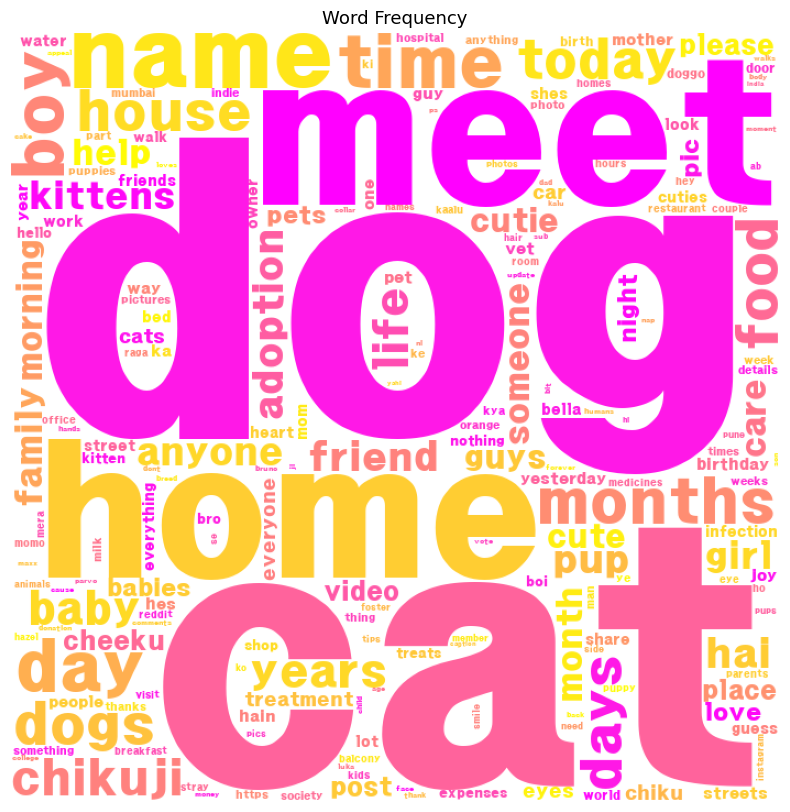

In [23]:
plt.figure(figsize = (10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Word Frequency", size = 13)
plt.show

#### 2) flair text로 나누어서 분석

In [24]:
posts_pd['flair text'].value_counts()

flair text
Photo/Video                 494
Adoption                     25
Discussion                   18
Help                         15
dog photo/vid :doge:         13
Vent                          7
cat photo/vid :cat_blep:      4
Behaviour                     3
Health                        2
Discussion :sloth:            1
Name: count, dtype: int64

In [25]:
# ask opinion, relationships, career, education, technology, personal advice, mental health
temp = posts_pd[posts_pd['flair text']=='Sports'].reset_index(drop=True)

In [27]:
temp

Empty DataFrame
Columns: [title, created_utc, flair text, selftext]
Index: []